In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score,mean_squared_error
from math import sqrt
%matplotlib inline

In [2]:
data=pd.read_csv('Advertising.csv',index_col=0)
data.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [3]:
data.columns=['TV', 'Radio', 'Newspaper', 'Sales']

In [4]:
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [5]:
data.shape

(200, 4)

<AxesSubplot:xlabel='Newspaper', ylabel='Sales'>

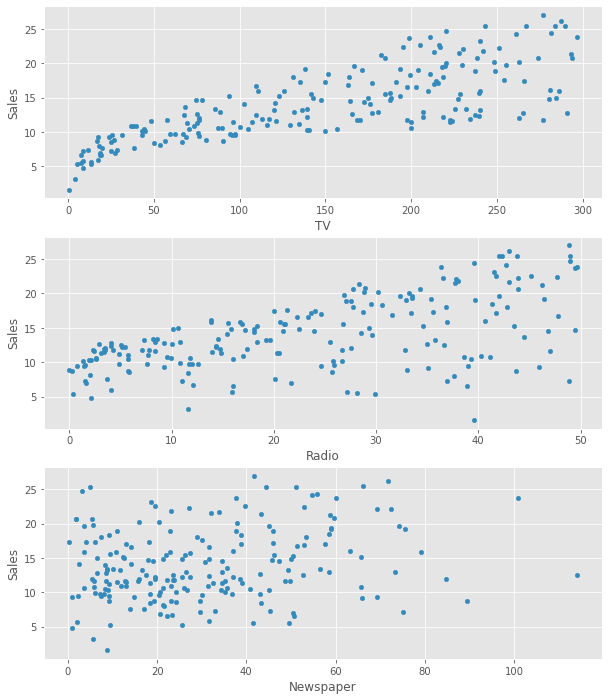

In [8]:
from matplotlib import style
style.use('ggplot')
fig,axs=plt.subplots(3,1,sharey=True)
data.plot(kind='scatter',x='TV',y='Sales',ax=axs[0],figsize=(10,12))
data.plot(kind='scatter',x='Radio',y='Sales',ax=axs[1])
data.plot(kind='scatter',x='Newspaper',y='Sales',ax=axs[2])

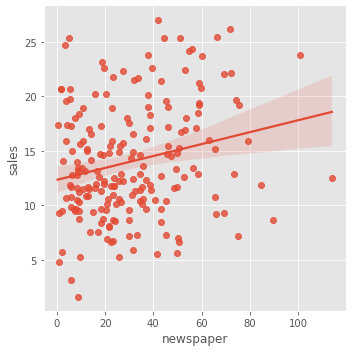

In [9]:
import seaborn as sns
data1=pd.read_csv('Advertising.csv',index_col=0)
sns.lmplot(x='newspaper',y='sales',data=data1)

In [10]:
feature_cols=['TV']
X=data[feature_cols]
y=data.Sales
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X,y)
print(lm.intercept_)
print(lm.coef_)


7.032593549127693
[0.04753664]


In [12]:
X_new=pd.DataFrame({'TV':[50]})
X_new

,TV
0,50


In [14]:
preds=lm.predict(X_new)
preds

array([9.40942557])

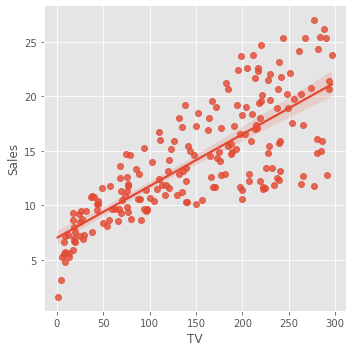

In [16]:
sns.lmplot(x='TV',y='Sales',data=data)

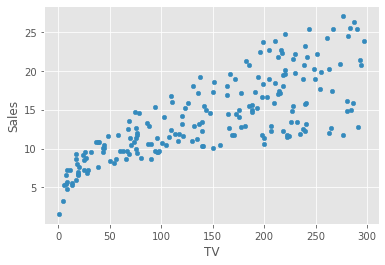

In [24]:
data.plot(kind='scatter',x='TV',y='Sales')
plt.show()


In [26]:
import statsmodels.api as sm
X=data['TV']
y=data['Sales']
X2=sm.add_constant(X)
est=sm.OLS(y,X2)
est2=est.fit()
print(est2.summary())



                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 19 Sep 2022   Prob (F-statistic):           1.47e-42
Time:                        15:21:18   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

In [29]:
features=['TV','Radio','Newspaper']
X=data[features]
y=data['Sales']
import statsmodels.api as sm
X2=sm.add_constant(X)
est=sm.OLS(y,X2)
est2=est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 19 Sep 2022   Prob (F-statistic):           1.58e-96
Time:                        18:57:43   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

In [30]:
features=['TV','Radio','Newspaper']
X=data[features]
y=data['Sales']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)


In [31]:
lm=LinearRegression()
lm.fit(X,y)

LinearRegression()

In [32]:
print(lm.intercept_)
print(lm.coef_)

2.9388893694594085
[ 0.04576465  0.18853002 -0.00103749]


In [34]:
lm.fit(X_train,y_train)
print(lm.intercept_)
print(lm.coef_)

2.8172751352949987
[0.0455864  0.18569816 0.00223281]


In [35]:
prediction=lm.predict(X_test)
print(sqrt(mean_squared_error(y_test,prediction)))
print(0.1*y_train.mean())

1.3165457764851067
1.3798750000000002


In [40]:
import numpy as np
np.random.seed(12345)
nums=np.random.rand(len(data))
nums
mask_large=nums>0.5
data['size']='small'
data.loc[mask_large,'size']='large'
data.head()

,TV,Radio,Newspaper,Sales,size
1,230.1,37.8,69.2,22.1,large
2,44.5,39.3,45.1,10.4,small
3,17.2,45.9,69.3,9.3,small
4,151.5,41.3,58.5,18.5,small
5,180.8,10.8,58.4,12.9,large


In [42]:
data['Islarge']=data['size'].map({'small':0,'large':1})

In [43]:
data.head()

,TV,Radio,Newspaper,Sales,size,Islarge
1,230.1,37.8,69.2,22.1,large,1
2,44.5,39.3,45.1,10.4,small,0
3,17.2,45.9,69.3,9.3,small,0
4,151.5,41.3,58.5,18.5,small,0
5,180.8,10.8,58.4,12.9,large,1


In [49]:
features=['TV', 'Radio', 'Newspaper', 'Islarge']
X=data[features]
y=data['Sales']
lm=LinearRegression()
lm.fit(X,y)
dfCoeffients = pd.DataFrame(data = lm.coef_, index = features , columns = ["Slope / Coeffient"])
dfCoeffients

,Slope / Coeffient
TV,0.045720
Radio,0.188728
Newspaper,-0.001098
Islarge,0.057424


In [50]:
np.random.seed(123456)
nums=np.random.rand(len(data))
mask_suburban=(nums>0.33)&(nums<0.66)
mask_urban=nums>0.66
data['Area']='rural'
data.loc[mask_suburban,'Area']='suburban'
data.loc[mask_urban,'Area']='urban'
data.head()

,TV,Radio,Newspaper,Sales,size,Islarge,Area
1,230.1,37.8,69.2,22.1,large,1,rural
2,44.5,39.3,45.1,10.4,small,0,urban
3,17.2,45.9,69.3,9.3,small,0,rural
4,151.5,41.3,58.5,18.5,small,0,urban
5,180.8,10.8,58.4,12.9,large,1,suburban


In [55]:
area_dummies=pd.get_dummies(data.Area,prefix='Area').iloc[:,1:]
area_dummies
data=pd.concat([data,area_dummies],axis=1)
data.head()

,TV,Radio,Newspaper,Sales,size,Islarge,Area,Area_suburban,Area_urban
1,230.1,37.8,69.2,22.1,large,1,rural,0,0
2,44.5,39.3,45.1,10.4,small,0,urban,0,1
3,17.2,45.9,69.3,9.3,small,0,rural,0,0
4,151.5,41.3,58.5,18.5,small,0,urban,0,1
5,180.8,10.8,58.4,12.9,large,1,suburban,1,0


In [59]:
feature_cols=['TV', 'Radio', 'Newspaper', 'Sales', 'Islarge',
       'Area_suburban', 'Area_urban']
X=data[feature_cols]
y=data.Sales
lm=LinearRegression()
lm.fit(X,y)
dfCoeffients_ = pd.DataFrame(data = lm.coef_, index = feature_cols , columns = ["Slope / Coeffient"])
dfCoeffients_


,Slope / Coeffient
TV,5.866809e-18
Radio,-3.330669e-16
Newspaper,-1.942890e-16
Sales,1.000000e+00
Islarge,6.591949e-17
Area_suburban,4.401861e-17
Area_urban,-5.464379e-17


Index(['TV', 'Radio', 'Newspaper', 'Sales', 'size', 'Islarge', 'Area',
       'Area_suburban', 'Area_urban'],
      dtype='object')